# Requirement
1- I think it would be a good way to evaluate the nutritional value of the Indian food listed in the Indian food dataset and determine whether they are **healthy or not**

2- I want to combine the nutritional data of each dish to the nutritional value to the food data set

3- And we set a specific value like cholesterol or calories to group healthy or unhealthy food dishes

# Data Engineering

In [ ]:
# File Mounting
from google.colab import files
upload = files.upload()

In [68]:
# Loading Dataset -- (veg and non veg)
import pandas as pd
df = pd.read_csv("IndianFood/veg-Non-veg/indian_food.csv")

## Data Understanding

In [69]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


This data set has 255 rows and 9 columns:
  - Name: Name of the dish.
  - Ingredients: Main Ingredients used for making Dish.
  - Diet: Vegiterian or Non-Vegiterian.
  - Prep-Time: Preparing Time.
  - Cook-Time: Cooking Time.
  - Flavour-Profile: Sweet,Salty,Bitter,Spicy.
  - Course: Course of meal - starter, main course, dessert, etc.
  - State: State where the dish is famous or is originated.
  - Region: region where the state belongs.
  

## Data Enrichment

In [71]:
# It is given in the description that -1 in the columns indicate nan values
# Therefore we want to replace -1 values with the info obtained  from google
# For example which food is famous in which region of india

df.iloc[7:8,7:8]= df.iloc[7:8,7:8].replace('-1','Delhi') #Kaju katli
df.iloc[9:10,7:8]=df.iloc[9:10,7:8].replace('-1','Uttar Pradesh') #Kheer
df.iloc[10:11,7:8]=df.iloc[10:11,7:8].replace('-1','Andhra Pradesh') #Laddu
df.iloc[12:13,7:8]=df.iloc[12:13,7:8].replace('-1','Gujarat') # Nankhatai

df.iloc[94:95,7:8]= df.iloc[94:95,7:8].replace('-1','Delhi') # Khichdi
df.iloc[96:97,7:8] = df.iloc[96:97,7:8].replace('-1','Andhra Pradesh') # Falooda
df.iloc[98:99,7:8]= df.iloc[98:99,7:8].replace('-1','Gujrat') # Lauki ki subji
df.iloc[109:110,7:8]= df.iloc[109:110,7:8].replace('-1','Delhi') # Pani Puri

df.iloc[111:112,7:8]=df.iloc[111:112,7:8].replace('-1','Tamil Nadu') # Pappad
df.iloc[117:118,7:8]=df.iloc[117:118,7:8].replace('-1','Uttar Pradesh') #samosa
df.iloc[164:165,7:8]=df.iloc[164:165,7:8].replace('-1','Andhra Pradesh') #Upma
df.iloc[231:232,7:8]=df.iloc[231:232,7:8].replace('-1','Tamil Nadu') # Brown Rice
df.iloc[248:249,7:8]=df.iloc[248:249,7:8].replace('-1','Tamil Nadu') # Red Rice
df.iloc[115:116,7:8] =df.iloc[115:116,7:8].replace('-1','Delhi') #rajma
df.iloc[128:129,7:8]= df.iloc[128:129,7:8].replace('-1','Tamil Nadu') #dosa
df.iloc[130:131,7:8]= df.iloc[130:131,7:8].replace('-1','Andhra Pradesh') #idli

df.iloc[144:145,7:8]= df.iloc[144:145,7:8].replace('-1','Andhra Pradesh') #masala dosa
df.iloc[145:146,7:8]= df.iloc[145:146,7:8].replace('-1','Andhra Pradesh') #pachadi 
df.iloc[149:150,7:8] =df.iloc[149:150,7:8].replace('-1','Andhra Pradesh') #payasam

df.iloc[154:155,7:8]= df.iloc[154:155,7:8].replace('-1','Andhra Pradesh') #rasam
df.iloc[156:157,7:8]= df.iloc[156:157,7:8].replace('-1','Tamil Nadu') #sambar
df.iloc[158:159,7:8]= df.iloc[158:159,7:8].replace('-1','Andhra Pradesh') #sevai
df.iloc[161:162,7:8]= df.iloc[161:162,7:8].replace('-1','Tamil Nadu') #Uttapam
df.iloc[162:163,7:8]= df.iloc[162:163,7:8].replace('-1','Tamil Nadu') #Vada

# Data Enrichemnt of state column, it is done with the help of google
df.iloc[7:8,8:9]= df.iloc[7:8,8:9].replace('-1','North')
df.iloc[9:10,8:9]=df.iloc[9:10,8:9].replace('-1','North') 
df.iloc[10:11,8:9]=df.iloc[10:11,8:9].replace('-1','South') 
df.iloc[12:13,8:9]=df.iloc[12:13,8:9].replace('-1','West') # Nankhatai

df.iloc[94:95,8:9]= df.iloc[94:95,8:9].replace('-1','North') # Khichdi
df.iloc[96:97,8:9] = df.iloc[96:97,8:9].replace('-1','South') # Falooda
df.iloc[98:99,8:9]= df.iloc[98:99,8:9].replace('-1','West') # Lauki ki subji
df.iloc[109:110,8:9]= df.iloc[109:110,8:9].replace('-1','North') # Pani Puri

df.iloc[111:112,8:9]=df.iloc[111:112,8:9].replace('-1','South') # Pappad
df.iloc[117:118,8:9]=df.iloc[117:118,8:9].replace('-1','North') #samosa
df.iloc[164:165,8:9]=df.iloc[164:165,8:9].replace('-1','South') #Upma
df.iloc[231:232,8:9]=df.iloc[231:232,8:9].replace('-1','South') # Brown Rice
df.iloc[248:249,8:9]=df.iloc[248:249,8:9].replace('-1','South') # Red Rice


df["region"]=df["region"].fillna(df["region"].mode()[0])
# We impute flavour with max number of examples present in data set
df["flavor_profile"]=df["flavor_profile"].replace("-1","spicy")
# We replace nan values in prep_time and cook_time with respective means of the column
df["prep_time"]=df["prep_time"].replace(-1,31)
df["cook_time"]=df["cook_time"].replace(-1,34)

# Learning about food type popular in india 

## Ingredient BreakDown

### Data Preperation for ingredient

In [93]:
# Lists that will be filled with each ingredient value, repeated or not
East = []
West = []
North = []
Others = []
NorthEast = []
South = []
Central = []

# Filling the lists
for row in range(len(df)):
    if df['region'][row] == 'East':
        East.extend(df['ingredients'][row].split(","))
    if df['region'][row] == 'West':
        West.extend(df['ingredients'][row].split(","))
    if df['region'][row] == 'North':
        North.extend(df['ingredients'][row].split(","))
    if df['region'][row] == 'North East':
        NorthEast.extend(df['ingredients'][row].split(","))
    if df['region'][row] == 'South':
        South.extend(df['ingredients'][row].split(","))
    if df['region'][row] == 'Central':
        Central.extend(df['ingredients'][row].split(","))
    if df['region'][row] == 'Others':
        Others.extend(df['ingredients'][row].split(","))

# Series witch include each unique ingredient value
all_ing = pd.Series(East+West+North+Others+NorthEast+South+Central).unique()

# Lists that will store the number of times each ingredient appears
EastC = []
WestC = []
NorthC = []
OthersC = []
NorthEC = []
SouthC = []
CentralC = []

# Filling the lists
for ingredient in all_ing:
    EastC.append(East.count(ingredient))
    WestC.append(West.count(ingredient))
    NorthC.append(North.count(ingredient))
    OthersC.append(Others.count(ingredient))
    NorthEC.append(NorthEast.count(ingredient))
    SouthC.append(South.count(ingredient))
    CentralC.append(Central.count(ingredient))

# Creating the dataset with the values collected
ing_per_region = pd.DataFrame({'East': EastC, 'West': WestC, 'North': NorthC, 'Others': OthersC, 'North East': NorthEC,
                               'South': SouthC, 'Central': CentralC}, index=all_ing) 

# Adding a column with the sum of all the other columns
ing_per_region['Sum'] = (ing_per_region['East'] + ing_per_region['West'] + ing_per_region['North'] + ing_per_region['Others'] 
                        + ing_per_region['North East'] + ing_per_region['South'] + ing_per_region['Central'])


<Figure size 864x1152 with 0 Axes>

<Figure size 864x1152 with 0 Axes>

### Top ingredient Visualization Region wise

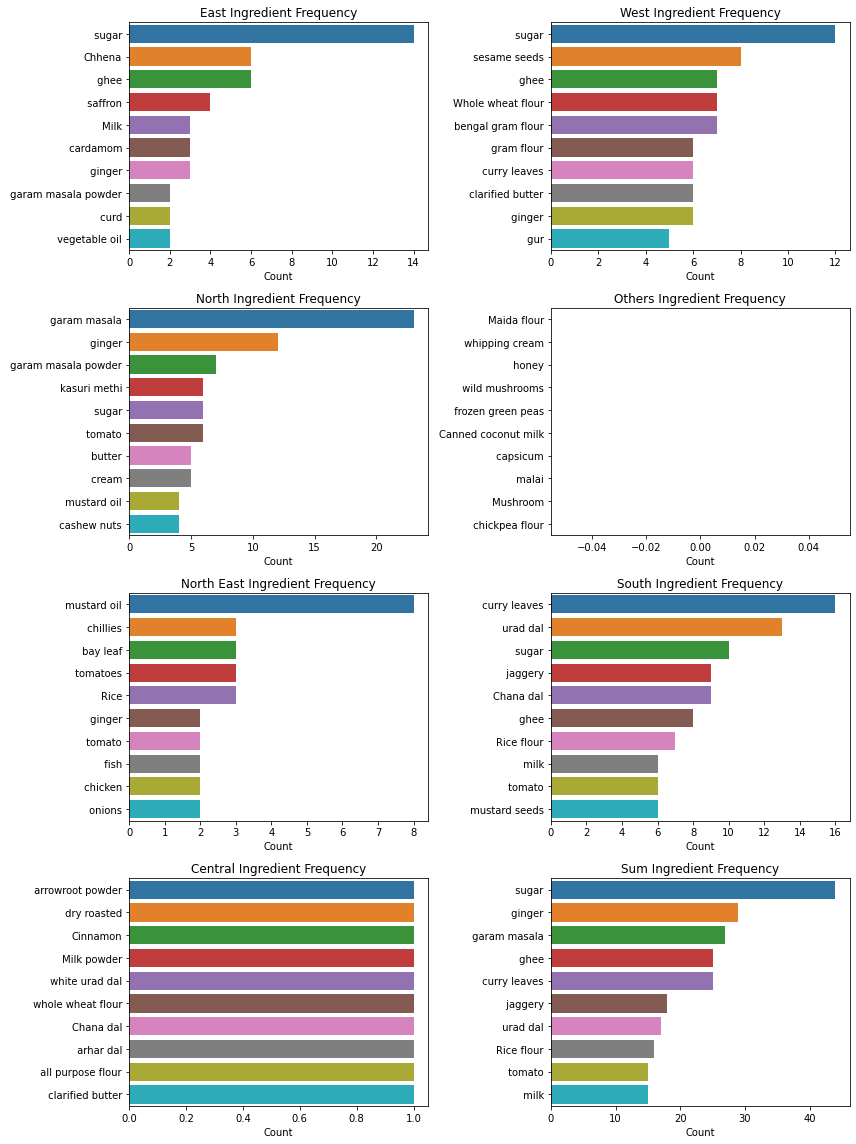

In [91]:
plt.figure(figsize=(12,16))
for n, region in enumerate(ing_per_region.columns):
    ordered = ing_per_region.sort_values([region], ascending=False)[0:10]
    plt.subplot(4, 2, n+1)
    sns.barplot(x=ordered[region], y=ordered.index, orient='h')
    plt.xlabel('Count')
    plt.title(f'{region} Ingredient Frequency')
plt.tight_layout()
plt.show()

**Findings:** 

First of all it's important to remember that this dataset doesn't include information about the frequency each of these dishes are consumed in India. Therefore, this analysis will be based solely in the frequency that the ingredients show throughout the recipes for each region, and may be biased depending on how well this dataset represent the indian diet.

With that in mind, our graphs can be pretty telling, the East, West and North regions show a high count of sugar. This may be related to the amount of desserts in there.

## Veg and Non-veg Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


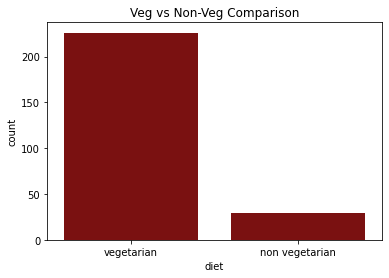

In [92]:
# First of all it is worth finding that which type is more popular in india
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df["diet"], color="darkred")
plt.title("Veg vs Non-Veg Comparison")
# show the plot
plt.show()


**Findings** 
1- Indian people like veg food more than no-veg and it is evident in the graphs

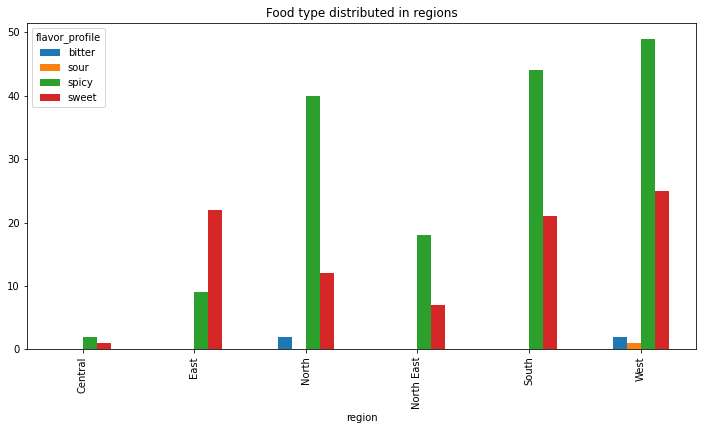

In [49]:
pd.crosstab(df["region"],df["flavor_profile"]).plot(kind="bar",figsize=(12,6))
plt.title("Food type distributed in regions")
plt.show()

**Findings** Most the people like to eat spicy and sweet food.

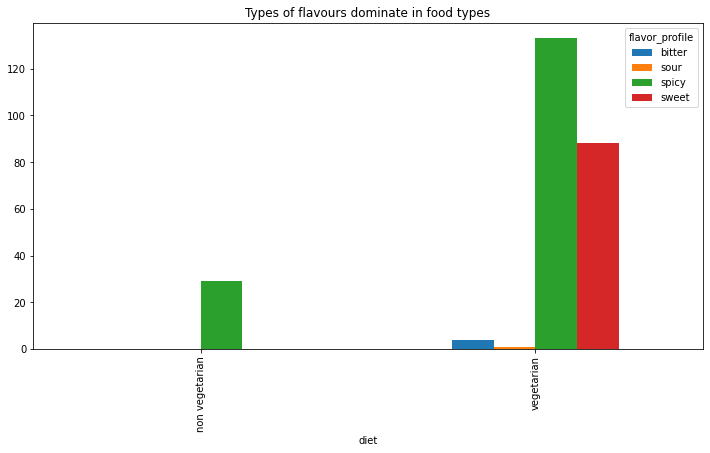

In [46]:
pd.crosstab(df["diet"],df["flavor_profile"]).plot(kind="bar",figsize=(12,6))
plt.title("Types of flavours dominate in food types")
plt.show()

**Finding**

1.   It is evident veg food has the variety which is missing in the non-veg.
2.   As indian's 80% of food items are veg therfore, spicy and sweet dishes are the most favourite flavours.

**Conclusion** As india people more inclined toward veg food as compared to non veg and with the help of plot we saw that sweet is the second most prominent flavour in the diet, therefore, high sugar cause bad effects on health and we can say that indian's have high cholestrol level which ultimately cause many health problems.

